<div align="center">

<h1 style="font-size: 2em;">Welcome to Deep Neural Networks!</h1>

<img src="deep.png" alt="Deep" style="width: 60%; margin: 20px 0;" />

<h2 style="font-size: 1.5em;">The Gist!</h2>

</div>




# Introduction to Deep Neural Networks (DNNs)

Deep Neural Networks (DNNs) are the foundation of modern artificial intelligence. Whether it's recognizing handwritten digits, detecting diseases from images, or powering voice assistants — DNNs are behind many of today's intelligent systems.

##  What is a Neural Network?

A **neural network** is a machine learning model inspired by the structure of the human brain. It consists of artificial "neurons" that process information:

- Each neuron receives inputs (features)
- It multiplies them by **weights**, adds a **bias**
- Then passes the result through an **activation function** (like sigmoid, ReLU, or tanh)
- The output is then sent to the next layer

The simplest form is the **single-layer perceptron**, which can only solve linearly separable problems (and I have previosuly explained the perceptron here).

---

## What Makes It “Deep”?

A **Deep Neural Network** has **multiple hidden layers** between the input and output layers.

Each layer extracts a more complex and abstract feature:

for instance, you can think of the layers as:
- Early layers detect **edges**
- Middle layers capture **shapes**
- Deeper layers identify **concepts** (digits, faces, objects)

This depth gives DNNs the power to model highly non-linear and abstract relationships in data.

---
## How Does a DNN Learn?

Training a DNN involves(Later described in detail):

1. **Forward pass**: Inputs are passed through the network to get predictions.
2. **Loss computation**: The difference between predictions and true labels is calculated using a **loss function**.
3. **Backward pass**: Gradients are computed via **backpropagation**.
4. **Update weights**: Weights are adjusted using **gradient descent** to minimize the loss.

This process is repeated over many **epochs** until the model converges.
---

## Why Deep Learning Works for bigger problems

- Multiple layers = more learning power
- Non-linear activation functions let us model complex data
- With enough **data** and **compute power**, DNNs can achieve **really good** results

---

## This implementation
I consider this the hardest of the models and so, I'll use the tried and tested MNIST data that is publicly available on the web(). MNIST consists of 70,000 images of hand written digits, 60,000 of which are typically used as labeled training examples and the other 10,000 used for testing your learning model on. I load the data with **tensorFlow.keras** 
For this digit recognition task:

- **Input**: 28×28 grayscale image (flattened to 784 pixels)
- **Output**: A vector of 10 probabilities (for digits 0–9)
- **Architecture**:
  - Input layer: 784 neurons
  - Hidden layer 1: 60 neurons
  - Hidden layer 2: 60 neurons
  - Output layer: 10 neurons 

Then my model is able to predict the digits accurately once fully trained successfully.


## This implementation

This is a **from scratch** implementation but a followup is done with TensorFlow.
---


In [56]:
from tensorflow import keras 
import numpy as np
import matplotlib.pyplot as plt

# Use the keras module to import the necessary data 
(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()

In [57]:
print(f"np.shape(train_X) ={np.shape(train_X)}")
print(f"np.shape(test_X) = {np.shape(test_X)} \n")

print(f"np.shape(train_X[0]) = {np.shape(train_X[0])}")
print(f"np.shape(test_X[0]) = {np.shape(test_X[0])} \n")

print(f"train_X[0] = {train_X[0]}")

np.shape(train_X) =(60000, 28, 28)
np.shape(test_X) = (10000, 28, 28) 

np.shape(train_X[0]) = (28, 28)
np.shape(test_X[0]) = (28, 28) 

train_X[0] = [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  

train_y[0] = 5 



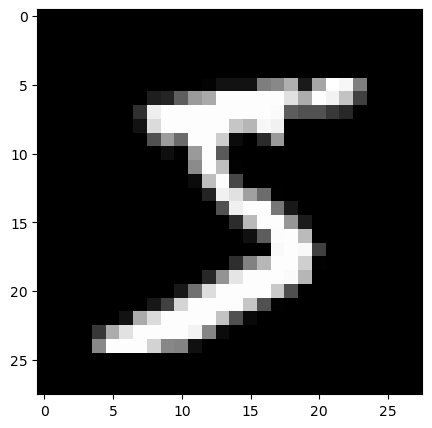

In [58]:
print(f"{train_y[0] = } \n")
plt.figure(figsize=(6, 5))
plt.imshow(train_X[0], cmap="gray")
plt.show()

When working with image data in deep learning, each image is typically represented as a matrix of pixel values. For grayscale images of size 28×28 (like those in the MNIST dataset), this gives us a 2D array of 784 values.

However, most neural networks expect flat vectors as input — not 2D images. To make an image compatible with the network, we need to flatten it: that is, convert the 28×28 matrix into a single column vector of 784 entries.

This process transforms the image into a shape the network understands, making it just another vector of input features, similar to what we’d use for simpler tasks like linear regression or logistic classification.

To prepare each image for input into the neural network, we first need to convert the image matrix into a column vector. This can be done using the `flatten()` method followed by `reshape(784, 1)` to ensure that the resulting structure is a column vector with 784 rows.

Since each image is 28×28 pixels, flattening results in a vector of length 784. The pixel values in these vectors typically range from **0 to 255**, which can introduce numerical instability during training. Large input ranges may lead to inefficient or unstable updates to the network’s weights and biases.

A simple and effective solution is to **scale all pixel values to fall within the interval [0, 1]**. This can be achieved by dividing every pixel by the maximum possible value — in this case, 255. This normalization step helps ensure smoother and more stable learning.


In [59]:
train_X = train_X/255
test_X = test_X/255

# Flatten the training images into coloumn vectors. 
flat_train_X = []
# One hot encode the training labels
onehot_train_y = []

for x, y in zip(train_X, train_y):
    flat_train_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y][0] = 1.0
    onehot_train_y.append(temp_vec)
   

# Do the same for the testing data 
flat_test_X = []
onehot_test_y = []

for x, y in zip(test_X, test_y):
    flat_test_X.append(x.flatten().reshape(784, 1))
    temp_vec = np.zeros((10, 1))
    temp_vec[y] = 1.0
    onehot_test_y.append(temp_vec)


## Activation Functions

Activation functions introduce non-linearity into the network, allowing it to learn complex patterns that go beyond simple linear relationships. They are applied to the output of each neuron (or node) in a layer.

### My implementation

One of the most popular activation functions is the sigmoid function:

$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

And the cost function is the Mean Square Root error(Although as shown before, this can be anything with similar effect)
$$ C(W,b) = \frac{1}{2} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2 $$

---

In [60]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def d_sigmoid(z): # Derivative of sigmoid   
    return sigmoid(z)*(1.0 - sigmoid(z))

def mse(a, y): # Mean Squared Error(our cost function)
    return .5*sum((a[i] - y[i])**2 for i in range(10))[0]

In [61]:
import numpy as np

def initialize_weights(layers = [784, 60, 60, 10]):
    '''Initializes weights and biases for our Dense neural network.

    Weights are drawn from a normal distribution centered on 0,
    scaled by the square root of 2 divided by the size of the previous layer.
    Biases are initialized similarly (Thanks to Dr. Davila Randy).

    Args:
        layers (list, optional): A list of integers where each element
            represents the number of neurons in a layer. The first element
            is the input layer size, and subsequent elements are the sizes
            of the hidden and output layers.
            Defaults to [784, 60, 60, 10].

    Returns:
        tuple: A tuple containing two lists:
            - W (list): A list of numpy arrays representing the weight matrices
              for each layer (from layer 1 onwards). `W[i]` contains the
              weights connecting layer `i-1` to layer `i`, with shape
              (layers[i], layers[i-1]). The first element `W[0]` is a
              placeholder `[[0.0]]` and is not used.
            - B (list): A list of numpy arrays representing the bias vectors
              for each layer (from layer 1 onwards). `B[i]` contains the
              biases for layer `i`, with shape (layers[i], 1). The first
              element `B[0]` is a placeholder `[[0.0]]` and is not used.

    Example:
        >>> W, B = initialize_weights([784, 128, 10])
        >>> print(len(W)) # Output: 3 (includes placeholder)
        >>> print(W[1].shape) # Output: (128, 784)
        >>> print(B[1].shape) # Output: (128, 1)
        >>> print(W[2].shape) # Output: (10, 128)
        >>> print(B[2].shape) # Output: (10, 1)
    '''
    W = [[0.0]]
    B = [[0.0]]

    # Iterate through the layers, starting from the first hidden layer (index 1)
    for i in range(1, len(layers)):
        w_temp = np.random.randn(layers[i], layers[i-1]) * np.sqrt(2 / layers[i-1])
        b_temp = np.random.randn(layers[i], 1) * np.sqrt(2 / layers[i-1])

        W.append(w_temp)
        B.append(b_temp)
    return W, B






# Feedforward Phase

The feedforward phase describes how input data propagates through the layers of a neural network to produce an output prediction. For a network with $L$ layers, the process for each layer $\ell$ (from $\ell=1$ to $L$) involves two main steps:

1.  **Preactivation ($z^\ell$)**: This step computes a weighted linear combination of the activations from the previous layer ($a^{\ell-1}$) and adds the bias term ($b^\ell$) specific to the current layer $\ell$.
    $$ z^\ell = W^\ell a^{\ell-1} + b^\ell $$
    Here, $W^\ell$ is the weight matrix connecting layer $\ell-1$ to layer $\ell$, and $b^\ell$ is the bias vector for layer $\ell$.

2.  **Postactivation ($a^\ell$)**: The preactivation value $z^\ell$ is then passed through a non-linear activation function $\sigma$ (Sigmoid in this case). This function is applied elementwise to the vector $z^\ell$.
    $$ a^\ell = \sigma(z^\ell) $$
    The result, $a^\ell$, represents the output (activations) of layer $\ell$, which serves as the input to the next layer, $\ell+1$.

**Initial Input:**
It's important to note that the activation of the "zeroth" layer ($a^0$) is simply the input data sample itself:
$$ a^0 = x^{(i)} $$
where $x^{(i)}$ is the $i$-th input vector fed into the network.

The final output of the network is the activation of the last layer, $a^L$.

---



In [62]:
def forward_pass(W, B, xi, predict_vector = False):

    """Performs the feedforward pass through the neural network.

    Calculates the preactivation (Z) and postactivation (A) values for each
    layer of the network for a single input sample xi, using the sigmoid
    activation function.

    Args:
        W (list): A list of numpy arrays representing the weight matrices
                  for each layer (starting from layer 1). W[i] connects
                  layer i-1 to layer i. Assumes W[0] is a placeholder.
        B (list): A list of numpy arrays representing the bias vectors
                  for each layer (starting from layer 1). B[i] is the bias
                  for layer i. Assumes B[0] is a placeholder.
        xi (numpy.ndarray): The input data sample, expected to be a column
                            vector (shape: [input_size, 1]). This corresponds
                            to the activation of the 0-th layer (a^0).
        predict_vector (bool, optional): If False (default), returns all
                                         intermediate Z and A values. If True,
                                         returns only the final activation
                                         vector A[L].

    Returns:
        tuple or numpy.ndarray:
            - If predict_vector is False: A tuple (Z, A) where:
                - Z (list): List of preactivation vectors for each layer
                            (starting from layer 1). Z[i] is the preactivation
                            for layer i. Includes a placeholder at Z[0].
                - A (list): List of activation vectors for each layer
                            (starting from layer 0). A[0] is the input xi,
                            and A[i] is the activation for layer i.
            - If predict_vector is True: The final activation vector A[L]
              (output of the last layer), as a numpy array.
    """
    Z = [[0.0]]
    A = [xi]
    L = len(W) - 1
    for i in range(1, L + 1):
        z = W[i] @ A[i-1] + B[i]
        Z.append(z)
        
        a = sigmoid(z)
        A.append(a)
        
    if predict_vector == False:
        return Z, A
    else:
        return A[-1]

def predict(W, B, xi):
    """Predicts the class label for a single input sample.

    Performs a forward pass and returns the index of the neuron with the
    highest activation in the output layer. This index in theory corresponds to the
    predicted class.

    Args:
        W (list): List of weight matrices.
        B (list): List of bias vectors.
        xi (numpy.ndarray): The input data sample (column vector).

    Returns:
        int: The index of the predicted class (0 to C-1, where C is the
             number of output neurons).
    """

    _, A = forward_pass(W, B, xi)
    return np.argmax(A[-1])

y_hat = forward_pass(W, B, flat_train_X[0], predict_vector=True)
print(f"Prediction: np.argmax(y_hat) = {np.argmax(y_hat)}")
print(f"Target Label: np.argmax(yi) = {np.argmax(yi)}")
print(f"mse(y_hat, yi) = {mse(y_hat, yi)}")

Prediction: np.argmax(y_hat) = 7
Target Label: np.argmax(yi) = 5
mse(y_hat, yi) = 1.358697988551251


We can do prediction before training the data to show the performance as below.

In [63]:
def random_experiment(W, B, data_features, data_labels):
    i = np.random.randint(len(data_features))
    print(f"Actual label: {np.argmax(data_labels[i])}")
    print(f"Predicted label: {predict(W, B, data_features[i])}")
    

def MSE(W, B, X, y):
    cost = 0.0
    m = 0
    for xi, yi in zip(X, y):
        a = forward_pass(W, B, xi, predict_vector = True)
        cost += mse(a, yi)
        m+=1
    return cost/m

In [64]:
print(f"MSE(W, B, flat_train_X, onehot_train_y) = {MSE(W, B, flat_train_X, onehot_train_y)} \n")

random_experiment(W, B, flat_train_X, onehot_train_y)

MSE(W, B, flat_train_X, onehot_train_y) = 1.3939404098350368 

Actual label: 2
Predicted label: 7


# Backpropagation with Stochastic Gradient Descent (SGD)

After the feedforward pass calculates the network's prediction, the **backpropagation** algorithm is used to compute the gradient of the cost function with respect to each weight and bias in the network. This gradient tells us how much a small change in each parameter would affect the overall error and allow us minimize the cost function.

**Stochastic Gradient Descent (SGD)** is an optimization algorithm(as previously implemented in Logistic Regression) that uses these gradients to update the network's parameters (weights and biases) iteratively. In its basic form, SGD updates the parameters after processing each individual training sample ($i=1, \dots, N$), although often mini-batches can be used in practice.

The core steps for one iteration of SGD using backpropagation are elaborated as follows:

**For each training sample $x^{(i)}$ (where $i=1, \dots, N$):**

1.  **Feedforward:**
    * Pass the input $x^{(i)}$ through the network, calculating the preactivations $z^\ell$ and activations $a^\ell$ for all layers $\ell=1, \dots, L$.
    * Store these intermediate values ($Z = [z^1, \dots, z^L]$ and $A = [a^0, a^1, \dots, a^L]$, where $a^0 = x^{(i)}$).

2.  **Compute Output Layer Error ($\delta^L$):**
    * Calculate the error term for the output layer $L$. This depends on the gradient of the cost function $C$ with respect to the output activations $a^L$ ($\nabla_a C$) and the derivative of the activation function $\sigma'$ evaluated at the preactivation $z^L$.
    * $$ \delta^L = \nabla_a C \otimes \sigma'(z^L) $$
    * *Note: $\nabla_a C$ depends on the specific cost function used (e.g., for MSE and sigmoid activation, it simplifies nicely). $\otimes$ represents elementwise product.*

3.  **Backpropagate Error ($\delta^\ell$):**
    * Compute the error term for each hidden layer, moving backward from $\ell = L-1$ down to $\ell = 1$. The error $\delta^\ell$ is calculated based on the error from the next layer ($\delta^{\ell+1}$) and the weights connecting them ($W^{\ell+1}$).
    * $$ \delta^\ell = ((W^{\ell+1})^T \delta^{\ell+1}) \otimes \sigma'(z^\ell) $$
    * *Note: $(W^{\ell+1})^T$ is the transpose of the weight matrix connecting layer $\ell$ to layer $\ell+1$.*

4.  **Compute Gradients & Update Parameters:**
    * Calculate the gradients of the cost function with respect to each weight matrix $W^\ell$ and bias vector $b^\ell$.
    * The gradient for the weights is: $\frac{\partial C}{\partial W^\ell} = \delta^\ell (a^{\ell-1})^T$
    * The gradient for the biases is: $\frac{\partial C}{\partial b^\ell} = \delta^\ell$
    * Update the weights and biases for all layers ($\ell = L, L-1, \dots, 1$) using the learning rate $\alpha$:
    * $$ W^\ell \leftarrow W^\ell - \alpha \frac{\partial C}{\partial W^\ell} = W^\ell - \alpha \delta^\ell (a^{\ell-1})^T $$
    * $$ b^\ell \leftarrow b^\ell - \alpha \frac{\partial C}{\partial b^\ell} = b^\ell - \alpha \delta^\ell $$

This entire process (Steps 1-4) is repeated for each training sample (in pure SGD) or for each mini-batch. Passing through the entire training dataset once is called an **epoch**, and training typically involves many epochs.


In [65]:
from tqdm import tqdm
class DenseNetwork(object):
    """
    This class encapsulates the network's architecture, weights, biases,
    and provides methods for training using Stochastic Gradient Descent (SGD)
    with backpropagation, and for making predictions on new data.

    Attributes:
        layers (list): A list of integers defining the number of neurons in
                       each layer, starting with the input layer.
        W (list): A list of numpy arrays holding the weight matrices for
                  connections between layers. W[i] connects layer i-1 to i.
                  W[0] is a placeholder.
        B (list): A list of numpy arrays holding the bias vectors for each
                  layer. B[i] is the bias for layer i. B[0] is a placeholder.
        errors_ (list): A list storing the Mean Squared Error (MSE) cost
                        calculated at the beginning and after each epoch
                        during training.
    """
    def __init__(self, layers = [784, 60, 60, 10]):

        '''Initializes the DenseNetwork.

        Sets up the network architecture and initializes the weights (W)
        and biases (B) using the `initialize_weights` function (expected
        to use He initialization or similar).

        Args:
            layers (list, optional): A list specifying the number of neurons
                in each layer, starting with the input layer size.
                Defaults to [784, 60, 60, 10].'''
        self.layers = layers
        self.W, self.B = initialize_weights(layers = self.layers)

    def train(self, X_train, y_train, alpha = 0.046, epochs = 4):
        """
        Trains the neural network using Stochastic Gradient Descent (SGD).

        Iterates through the training data for a specified number of epochs,
        performing the feedforward and backpropagation steps for each sample
        to update the network's weights and biases. Uses the sigmoid activation
        function and its derivative, and assumes Mean Squared Error (MSE) as
        the cost function implicitly in the backpropagation calculation
        (specifically in the output error delta calculation).

        Args:
            X_train (list or numpy.ndarray): The training input data. Should
                be a list or array where each element is a training sample
                (e.g., a flattened image vector). Assumes samples are ready
                to be fed into the network (e.g., shape [num_features, 1] or
                flattened).
            y_train (list or numpy.ndarray): The corresponding training target
                labels. Should be a list or array where each element is the
                target vector for a sample (e.g., a one-hot encoded vector).
            alpha (float, optional): The learning rate for gradient descent.
                Defaults to 0.046.
            epochs (int, optional): The number of times to iterate through the
                entire training dataset. Defaults to 4.
        """
        # Print the initial mean squared error
        self.errors_ = [MSE(self.W, self.B, X_train, y_train)]
        print(f"Starting Cost = {self.errors_[0]}")

        # Find your sample size
        sample_size = len(X_train)

        # Find the number of non-input layers.
        L = len(self.layers) - 1

        # For each epoch perform stochastic gradient descent. 
        for k in tqdm(range(epochs),desc="Training..."):
            # Loop over each (xi, yi) training pair of data.
            for xi, yi in zip(X_train, y_train):
                # Use the forward pass function defined before
                # and find the preactivation and postactivation values.
                Z, A = forward_pass(self.W, self.B, xi)

                # Store the errors in a dictionary for clear interpretation
                # of computation of these values.
                deltas = dict()

                # Compute the output error 
                output_error = (A[L] - yi)*d_sigmoid(Z[L])
                deltas[L] = output_error

                # Loop from L-1 to 1. Recall the right entry of the range function 
                # is non-inclusive. 
                for i in range(L-1, 0, -1):
                    # Compute the node errors at each hidden layer
                    deltas[i] = (self.W[i+1].T @ deltas[i+1])*d_sigmoid(Z[i])

                # Loop over each hidden layer and the output layer to perform gradient 
                # descent. 
                for i in range(1, L+1):
                    self.W[i] -= alpha*deltas[i] @ A[i-1].T
                    self.B[i] -= alpha*deltas[i]

            # Show the user the cost over all training examples
            self.errors_.append(MSE(self.W, self.B, X_train, y_train))   
            print(f"{k + 1}-Epoch Cost = {self.errors_[-1]}")
    

    def predict(self, xi):
        """
        Predicts the class label for a single input sample.

        Performs a feedforward pass using the current weights and biases
        and returns the index of the neuron with the highest activation
        in the output layer.

        Args:
            xi (numpy.ndarray): The input data sample (e.g., a flattened
                image vector). Should be compatible with the network's
                input layer size.

        Returns:
            int: The index corresponding to the predicted class label.
        """
        depth = len(self.layers)
        _, A = forward_pass(self.W, self.B, xi)
        return np.argmax(A[-1])

MSE(net.W, net.B, flat_train_X, onehot_train_y) = 1.294123884019416 

predicted digit is: 4
actual digit is: 1


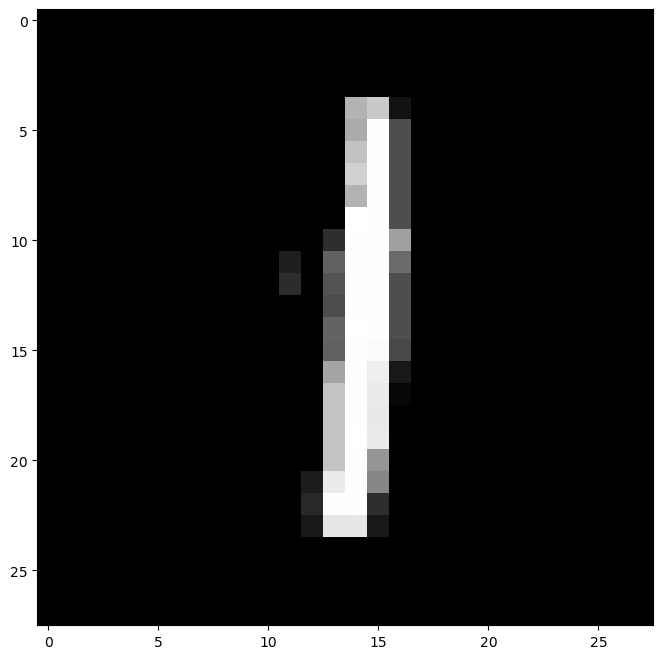

In [66]:
# Initialize a network with 784 input nodes, two hidden layers with 60 nodes each 
# and a output layer with 10 nodes. 
net = DenseNetwork(layers = [784, 120, 145, 120, 10])

# Check the mean squared error before training 
print(f"MSE(net.W, net.B, flat_train_X, onehot_train_y) = {MSE(net.W, net.B, flat_train_X, onehot_train_y)} \n")

# Make a random prediction before training
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [67]:
net.train(flat_train_X, onehot_train_y)

Starting Cost = 1.294123884019416


Training...:  25%|██▌       | 1/4 [00:48<02:26, 48.75s/it]

1-Epoch Cost = 0.08652727265218145


Training...:  50%|█████     | 2/4 [01:34<01:33, 46.85s/it]

2-Epoch Cost = 0.05456448753811335


Training...:  75%|███████▌  | 3/4 [02:16<00:44, 44.65s/it]

3-Epoch Cost = 0.041403811787300356


Training...: 100%|██████████| 4/4 [03:17<00:00, 49.41s/it]

4-Epoch Cost = 0.033909593150098616


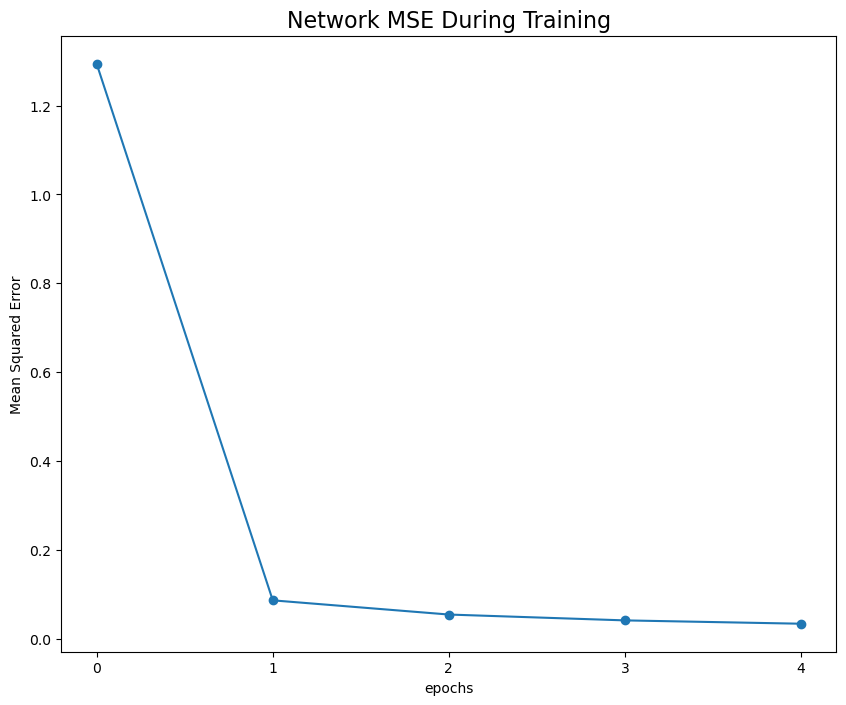

In [68]:
plt.figure(figsize = (10, 8))
epochs = range(len(net.errors_))
plt.plot(epochs, net.errors_, marker = "o")
plt.xticks(epochs)
plt.xlabel("epochs")
plt.ylabel("Mean Squared Error")
plt.title("Network MSE During Training", fontsize = 16)
plt.show()

predicted digit is: 7
actual digit is: 7


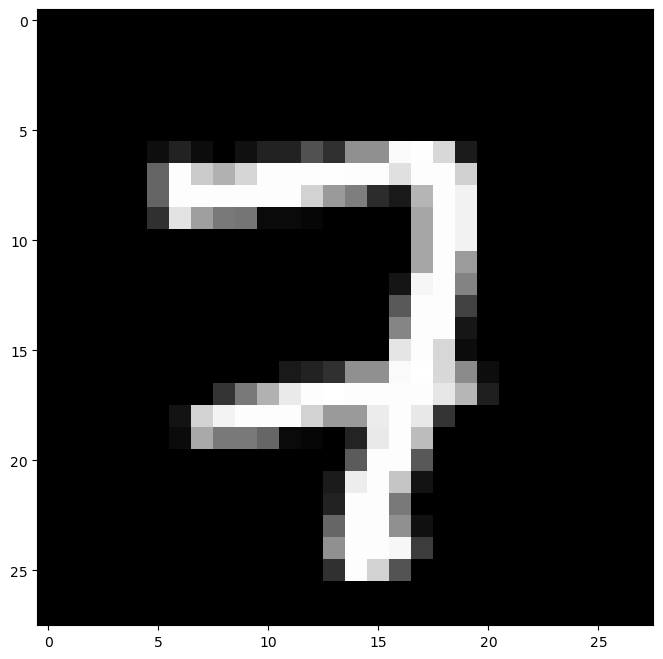

In [69]:
i = np.random.randint(0, len(flat_test_X))
prediction = net.predict(flat_test_X[i])
print(f"predicted digit is: {prediction}")
print(f"actual digit is: {np.argmax(onehot_test_y[i])}")
plt.figure(figsize=(8, 8))
plt.imshow(test_X[i], cmap="gray")
plt.show()

In [70]:
sum([int(net.predict(x) == y) for x, y in zip(flat_test_X, test_y)])/len(onehot_test_y)

0.954